# 1) Model Evaluation & Selection.

- As we discussed earlier, the objective function that's optimized during the training phase may be a different, what's called a surrogate metric. That's easier to use in practice for optimization purposes than what's used for the evaluation metric. For example, a commercial search engine might use a ranking algorithm that is trained to recommend relevant web pages that best match a query. In other words, trying to predict a relevant label for a page.
___
- And that might be the objective in the training phase. But there are many evaluation methods in the evaluation phase that could be applied to measure aspects of that search engine's performance using that ranking algorithm, that are important to the search company's business, for example. Such as how many unique users the system sees per day. Or how long the typical user search session is and so on.

**So the evaluation measures are the ones that in the end are used to select between different trained models or settings.**

- So it's very important to choose evaluation methods that match the goal of your application. For predicting the correct digit from a handwritten image, let's say, where each digit is equally likely, then accuracy may be a sufficient metric.
___
- However, there are other possible aspects of evaluation of model performance that are beyond average accuracy that may be critical to measure. For example, in a health application that uses a classifier to detect tumors in a medical image, we may want the classifier to error on the side of caution. And flag anything that even has a small chance of being cancerous. Even if it means sometimes incorrectly classifying healthy tissue as diseased.
_____
## imbalanced class scenario.

- For example, we might see this scenario in online search or recommender systems. Where the system has to predict whether or not to display an advertisement or product suggestion.Or show a query suggestion or item on a page that's likely to be relevant given a user's query and what they clicked on in the past and so on. So those would be the positive examples.
___
- But of course there are many, many irrelevant items that are in the negative class that don't make sense to show a user. And so this is called an `imbalanced class scenario`.
___
- Another example might be datasets of credit card transactions. Where the vast majority of transactions are classified as normal and not fraud with a small minority of transactions that could be classified as fraudulent.
___
- These situations, which also apply to multi-class classification problems, involve datasets that have imbalanced classes. Imbalanced classes are very common in machine learning scenarios, so it's important to understand how to work with them.
___
Let's take a look at another example of classification with imbalanced classes on a real dataset using our notebook:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rcParams['figure.facecolor'] = '#00000000'

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# This dataset has images of handwritten digits labeled with 10 classes,
# representing the digits 0 through 9.
dataset = load_digits()
X, y = dataset.data , dataset.target

# np.bincount : to show the instances of each class.
for class_name , class_count in zip(dataset.target_names , np.bincount(dataset.target)):
    print(class_name, class_count)


0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


**So,now we have balanced dataset that have almost the same num of instances in each class.our goal now to craete a dataset with two imbalanced classes.**

By labelling all digits that are not digit 1 as the negative class,and digits that are 1 as the positive class ,label 1.

In [3]:
X,y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [4]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original Labels:  ',y[1:30])
print('New binary Labels:  ',y_binary_imbalanced[1:30])
print('The distribution for calsses [0 , 1]:', np.bincount(y_binary_imbalanced))

print('\n    NOW, we have a datasset that is class imbalanced.')

Original Labels:   [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary Labels:   [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
The distribution for calsses [0 , 1]: [1615  182]

    NOW, we have a datasset that is class imbalanced.


In [5]:
# now, we gonna apply Support vector machine classifier 
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,
                                                 random_state=0)
svm = SVC(kernel='rbf',C=1).fit(X_train,y_train)
svm.score(X_test,y_test)

0.9955555555555555

### Again at first glance, 90% accuracy for a classifier seems pretty good.
# BUT: 
lets create a dummy classifier to see if 90% is that impressive.
### Dummy Classifiers.
- Dummy classifiers, again, are called that because they don't even look at the data to make a prediction. They simply use the strategy or rule of thumb that you instruct them to use, when creating them. In fact, when you create the classifier, you set the strategy argument to tell it what rule of thumb to use to make its predictions. So here, we set this to the most frequent strategy to predict the most frequent class.

- The DummyClassifier here is used just like a regular classifier. So to prepare it for prediction, we call the fit method on the x_train and y_train variables that hold the training set instances and labels. Now this DummyClassifier won't actually be looking at the individual data instances of those variables. But it does use the y train variable to determine which class in the training data is most frequent.

- Finally, just like a regular classifier, we can call the predict method to make predictions on the test set.This example shows the output of the DummyClassifier's predictions. And as promised, you can see it's always predicting 0 or the negative class for every instance in the test set.

In [6]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,
                                                                y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
dummy_majority.score(X_test,y_test)

0.9044444444444445

**So that support vector classifier was actually performing only very slightly better than the DummyClassifier.**

## strategy parameters.
There are other types of dummy classifiers that provide null base lines corresponding to other choices of the strategy parameter as shown here:

- `Most_frequent` is the strategy we've just seen that always predicts the most_frequent label.
- `The stratified` strategy, unlike the constant most_frequent prediction is a random prediction that's based on the class distributions. For example, if the positive class occurs 90% of the time in the training set. Then the stratified DummyClassifier will output the positive class label with 90% probability. Otherwise, it will output the negative class label.

This can help ensure that metrics that rely on having counts of both positive and negative class prediction outcomes can be computed.
- `The uniform strategy` is another random prediction method that will generate class predictions uniformly at random. That is, all classes have an equal chance at being output as opposed to being weighed by their frequency in the training set.

This strategy may be useful for gaining an accurate estimate of what the most common types of prediction errors for each class.

- Finally, the `constant strategy` can be useful when computing some metrics like F score, which we will cover in a few minutes. Well, why is that?

Well, when we have a binary classification task where the most frequent class is the negative class. Turns out that using the most frequent strategy will never predict the positive class. And will never be able to count the number of positive instances that are correctly predicted. And so the overall count of such positive correct predictions will be 0. So this in turn as you will see in a few minutes, we'll cause some important metrics like `F scores` to always be zero. So using the constant strategy, we can force a dummy classifier to always predict the positive class even if it's the minority class in a set of classes. And this will lead to more meaningful computation of F-score.

![equal_dummy](equal_dummy.png)

SO, lets alter the kernel we specified in SVM calssifier before, and see if there is a  differance in the accuracy score or not.

In [8]:
svm = SVC(kernel = 'linear' ,C=1).fit(X_train,y_train)
svm.score(X_test,y_test)

0.9777777777777777

Finally, if you have accuracy that is close to that of a dummy classifier, it could be because there is indeed a large class imbalance. And the accuracy gains produced by the classifier on the test set simply applied too few examples to produce a significant gain.

In general, for imbalanced classification problems, you should use metrics other than accuracy. We'll look at one shortly called AUC, which is short for area under the curve.

![dummy_regressors](dummy_regressors.png)

DummyRegressors, as you might guess, are the counterpart to DummyClassifiers for regression. And they serve a similar role as a null outcome baseline and sanity check for regression models. Since regression models have continuous value prediction outputs. The strategy parameter for DummyRegressors gives you a choice of function that you can apply to the distribution of target values found in the training set. You can ask for the mean or median value of the training set targets. The value corresponding to the quantile that you provide Or a custom constant value.
___

Now let's look more carefully at the different types of outcomes we might see using a binary classifier. This will give us some insight into why using just accuracy doesn't give a complete picture of the classifier's performance. And will motivate our definition and exploration of additional evaluation metrics:
![binary_predic_outcome](binary_predic_outcome.png)
## confusion Matrix:
- **binary(2-class) confusion matrix**
![confusion_matrix](confusion_matrix.png)


In [9]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,
                                                                y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test,y_majority_predicted)
print('Most frequent class (dummy classifier)\n',confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [10]:
# produces random predictions w/ same class proportion as training set

dummy_classprop = DummyClassifier(strategy = 'stratified').fit(X_train,
                                                                y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test,y_classprop_predicted)
print('Random class-proportional prediction (dummy classifier)\n',confusion)

Random class-proportional prediction (dummy classifier)
 [[373  34]
 [ 41   2]]


In [11]:
# lets try it with support vector machine classiffier.
svm = SVC(kernel = 'linear',C=1).fit(X_train,y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test , svm_predicted)

print('Support vector machine classifier (linear kernel, c=1)\n',confusion)

Support vector machine classifier (linear kernel, c=1)
 [[402   5]
 [  5  38]]


In [12]:
# lets try it with Logistic Regression classiffier.
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression().fit(X_train, y_train)
logis_reg_predicted = logis_reg.predict(X_test)
confusion = confusion_matrix(y_test,logis_reg_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[401   6]
 [  8  35]]


C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Finally, lets try it with Decision Tree classiffier.
from sklearn.tree import DecisionTreeClassifier
decicion_T = DecisionTreeClassifier(max_depth= 2).fit(X_train, y_train)
decicion_T_predicted = decicion_T.predict(X_test)
confusion = confusion_matrix(y_test, decicion_T_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


- One thing we notice is, that unlike the support vector or logistic regression classifier, which had balanced numbers of false negatives and false positives. The decision tree makes more than twice as many false negative errors, 17 of them actually, as false positive errors, of which there are 7.


Now that we've seen how a confusion matrix can give us a little more information about the types of errors a classifier makes, we're ready to move ahead and and define some new types of evaluation metrics that `use information from the computing matrix` to give different perspectives on classifier performance.

# 2) Confusion Matrices & Basic Evaluation Metrics.
1. **`Accuracy` = TP + TN / (TP + TN + FP + FN)**

2. **`Precision` = TP / (TP + FP)**

3. **`Recall` = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate**

4. **`F1` = 2 * Precision * Recall / (Precision + Recall)**

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,
                                               decicion_T_predicted)))
print('precision: {:.2f}'.format(precision_score(y_test,
                                                 decicion_T_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test,
                                           decicion_T_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test,
                                   decicion_T_predicted)))

Accuracy: 0.95
precision: 0.79
Recall: 0.60
F1: 0.68


### Get combined report with all the above merics using `Classification Report`. 

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,decicion_T_predicted,target_names = ['Not 1','1']))

              precision    recall  f1-score   support

       Not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [16]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, logis_reg_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, decicion_T_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.92      0.91       407
           1       0.06      0.05      0.05        43

    accuracy                           0.83       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.82      0.83      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

- Here we show classification reports for four different classifiers on the binary digit classification problem. The first set of results is from the dummy classifier and we can see that as `expected both precision and recall for the positive class are very low` since the dummy classifier is `simply guessing randomly with low probability of predicting that positive class` for the positive instances.

# 3) Classifier Decision Functions.

### 1st : Decision Function

- Here's an example in the notebook showing the first few instances from our classification problem using a logistic regression classifier. We can see the instances in the negative class often have large magnitude negative scores. And indeed the instances in the positive class has positive scores from the logistic regression classifier.

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,
                                                 random_state = 0)
logistic_reg = LogisticRegression().fit(X_train,y_train)
y_score_Log_reg = logistic_reg.decision_function(X_test)
y_score_list = list(zip(y_test[0:20] , y_score_Log_reg[0:20]))
y_score_list

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828780122412308),
 (0, -19.382862030530184),
 (0, -29.198492315019383),
 (0, -21.74628543622176),
 (0, -22.642376912827647),
 (0, -11.805930993502658),
 (1, 6.4960075848698615),
 (0, -23.35461769048256),
 (0, -27.54381690026825),
 (0, -26.888212044652814),
 (0, -31.86296841355937),
 (0, -22.486081290223364),
 (0, -25.318028584392277),
 (0, -13.384518628616874),
 (0, -13.565643429049114),
 (0, -13.308352089647723),
 (1, 12.180938449259916),
 (0, -34.362430815142936),
 (0, -13.23154393413785),
 (0, -29.593982949361617)]

### 2nd : Predict Proba

- Likewise, the predict proba function provides predicted probabilities of class membership. Typically a classifier which use the more likely class. That is in a binary classifier, you find the class with probability greater than 50%. Adjusting this decision threshold affects the prediction of the classifier.


- A higher threshold means that a classifier has to be more confident in predicting the class. For example, we might predict class one only if the estimated probability of class one was over 70%. And this results in a more conservative classifier.


- Here's an example of getting these prediction probabilities for the test instances for the same logistic regression classifier. You can see that many entries with a positive label of one, have a high probability like 0.995. While many negative label instances have a very low prediction probability.

`Note`  : that not all models provide useful probability estimates of this type. For example, a model that was over-fit to a trending set. Might provide overly optimistic high probabilities that were in fact not accurate.

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,
                                                  random_state = 0)
logistic_reg = LogisticRegression().fit(X_train,y_train)

# predicting probability.
y_proba_Log_reg = logistic_reg.predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20],y_proba_Log_reg[0:20,1]))
y_proba_list

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.110517459593521e-13),
 (0, 3.820585956448586e-09),
 (0, 2.0857195297155586e-13),
 (0, 3.595077301190379e-10),
 (0, 1.4673734251399272e-10),
 (0, 7.460124509137367e-06),
 (1, 0.9984928214717077),
 (0, 7.198108854184124e-11),
 (0, 1.091119480651798e-12),
 (0, 2.1018314238773634e-12),
 (0, 1.452408028597767e-14),
 (0, 1.7156116075914767e-10),
 (0, 1.0104617842902744e-11),
 (0, 1.5387807630727936e-06),
 (0, 1.283853169890642e-06),
 (0, 1.6605631764475244e-06),
 (1, 0.9999948727626726),
 (0, 1.1928502123299163e-15),
 (0, 1.7931338274640275e-06),
 (0, 1.404418389683268e-13)]

## - The effect of varying the `Decision Threshold`.
![decison_threshold2](decison_threshold2.png)

# 4) Precision-recall & ROC curves.

![precision_recall](precision_recall.png)


<IPython.core.display.Javascript object>


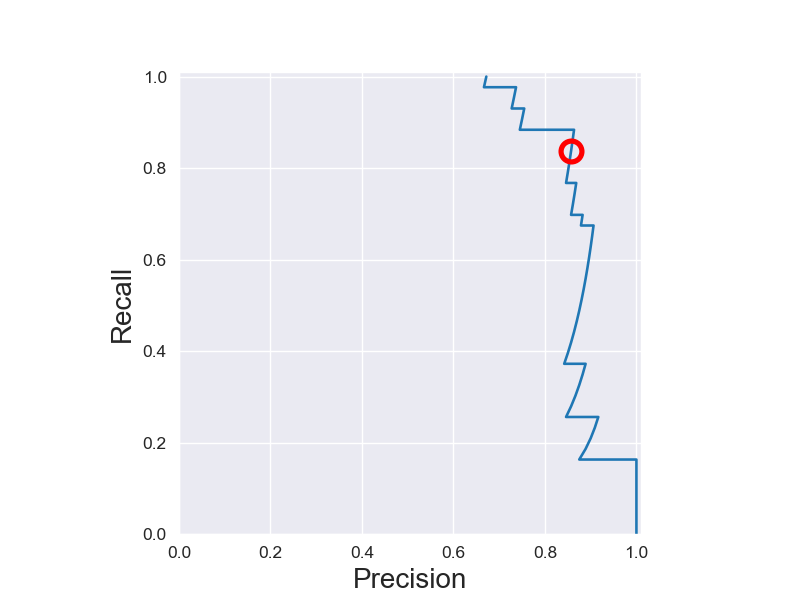

<ipython-input-20-68423fc403a6>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_score_Log_reg)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

![ROC](ROC.png)


C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


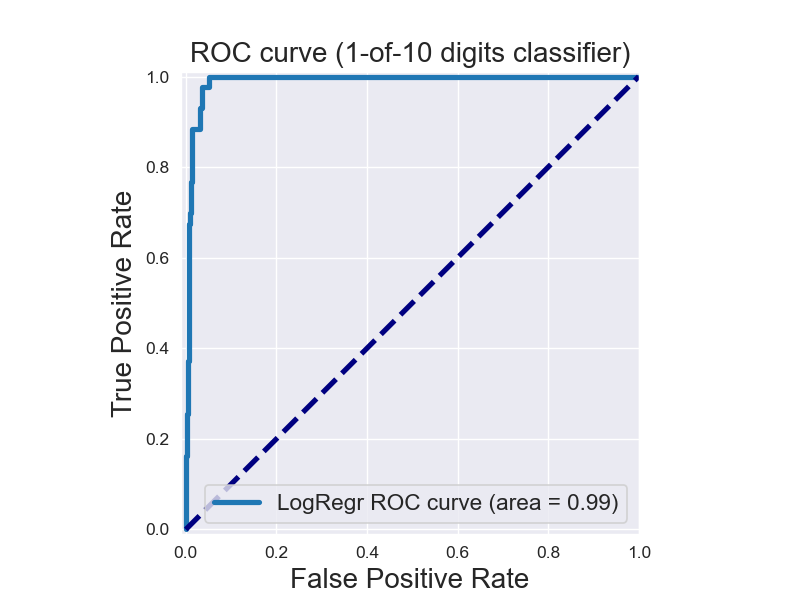

<ipython-input-21-2a159b7da602>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [21]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = LogisticRegression().fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


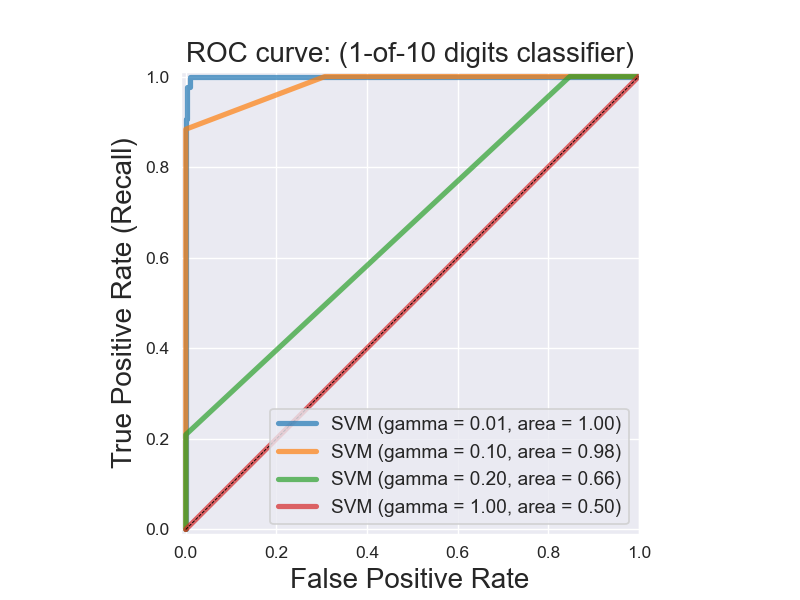

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


<ipython-input-22-f51d43e980ce>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [22]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

# 5) Multi-Class Evaluation.

<IPython.core.display.Javascript object>


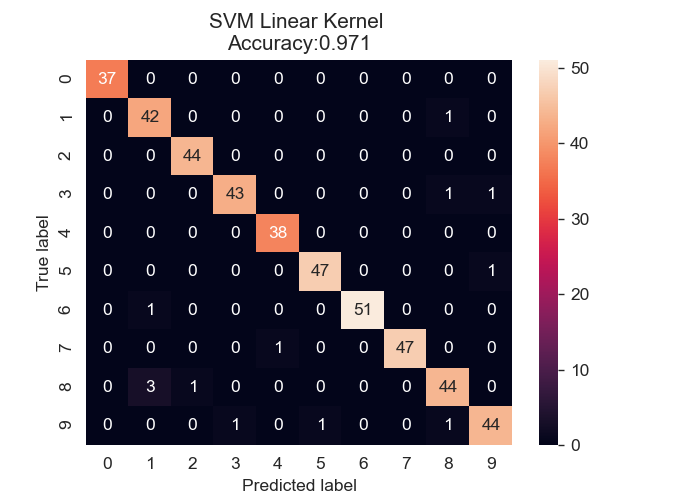

<IPython.core.display.Javascript object>


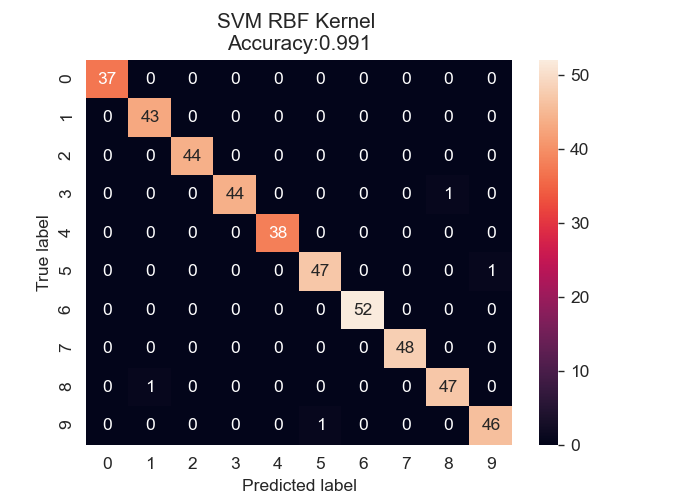

In [23]:
dataset = load_digits()
X, y = dataset.data, dataset.target
# mc : multi class
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

#___________________________________________________________


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc,svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

#___________________________________________________________

svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc,svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

Clearly, something is broken with this model and I picked this second example just to show an extreme example of what you might see when things go quite wrong. This digits dataset is well-established and free of problems. But especially when developing with a new dataset, seeing patterns like this in a confusion matrix could give you `valuable clues about possible problems`, say in the feature pre-processing for example:


- So as a general rule of thumb as part of model evaluation, I suggest always looking at the confusion matrix for your classifier. To get some insight into what kind of errors it is making for each class including whether `some classes are much more prone to certain kinds of errors` than others.

![bad_model](bad_model.png)


###  Multi-class classification Report.

In [24]:
print(classification_report(y_test_mc,svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Micro VS. Macro average

![micro_vs_macro2](micro_vs_macro2.png)
![micro_vs_macro3](micro_vs_macro3.png)


In [25]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [26]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


# 6) Regression Evaluation.
- In practice though it turns out that for most applications of regression, distinguishing between these types of different errors is not as important.


- This simplifies evaluation for regression quite a bit. In most cases, the default `r squared` score that's available for regression and psychic learn and that summarizes how well future instances will be predicted. It's adequate for most tasks.

![regression_metrics](regression_metrics.png)
![dummy_vs_linear](dummy_vs_linear.png)


[linear model] , coefficients:  [-698.80206267]

Mean squared error [dummy]: 4965.13
Mean squared error [linear reg Model]: 4646.74

R2_score [dummy] :-0.00
R2_score [linear reg Model] :0.06


<IPython.core.display.Javascript object>


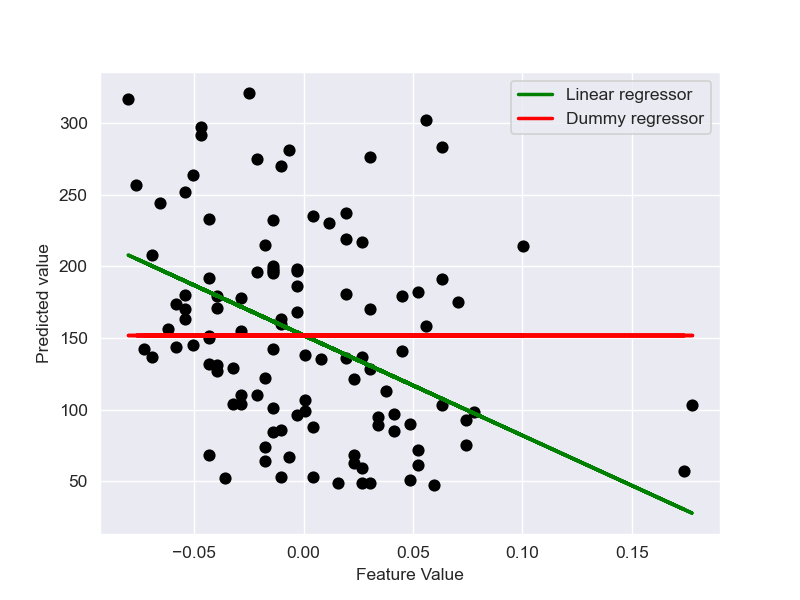

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()
# divide it to features & labels
X= diabetes.data[: , None, 6]
y= diabetes.target

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)
dummy_reg = DummyRegressor(strategy='mean').fit(X_train, y_train)

y_predicted_Lreg = lin_reg.predict(X_test)
y_predicted_Dreg = dummy_reg.predict(X_test)

print('[linear model] , coefficients: ', lin_reg.coef_)

print('\nMean squared error [dummy]: {:.2f}'.format(mean_squared_error(y_test,
                                                        y_predicted_Dreg)))
print('Mean squared error [linear reg Model]: {:.2f}'.format(mean_squared_error
                                                 (y_test,y_predicted_Lreg)))

print('\nR2_score [dummy] :{:.2f}'.format(r2_score(y_test,y_predicted_Dreg)))
print('R2_score [linear reg Model] :{:.2f}'.format(r2_score(y_test,
                                                    y_predicted_Lreg)))

# plot outputs.
plt.xlabel('Feature Value')
plt.ylabel('Predicted value')

# plot the test points.
plt.scatter(X_test,y_test , color = 'black')
# plot the Linear regressor result.
plt.plot(X_test ,y_predicted_Lreg , color = 'green',label='Linear regressor',
        linewidth=2)
# plot the Dummy regressor (mean strategy) result.
plt.plot(X_test , y_predicted_Dreg , color ='red',label='Dummy regressor',
        linewidth=2)
plt.legend();

Aside from the strategy of always predicting the mean of the training target values, you could also create some other flavors of dummy regressors that always predict the median of the training target values, or a particular quantile of those values, or a specific custom constant value that you provide:

![dummy_regressors_flavors](dummy_regressors_flavors.png)
- Although regression typically has simpler evaluation needs than classification, it does pay to double check to make sure the evaluation metric you choose for a regression problem does penalize errors in a way that reflects the consequences of those errors for the business, organizational, or user needs of your application.


# 7) Model Selection: Optimizing Classifiers for Different Evaluation Metrics.

Now that you've seen a number of different evaluation metrics for both binary and multiclass classification, let's take a look at how you can apply them as criteria for selecting the best classifier for your application, otherwise known as **`model selection`**. 
![model_selection](model_selection.png)


### - Important:

`3rd`, we used k-fold cross-validation to create K random train-test splits, where the evaluation metric was averaged across splits. This leads to models that are more **`reliable on unseen data`**. In particular, we can also use grid search using for example the **`GridSearchCV method`** within each cross-validation fold, to find **`optimal parameters`** for a model with respect to the **`evaluation`** metric:

- The default evaluation metric used for a `cross-val score` or `GridSearchCV` is **accuracy**.So how do you apply the new metrics you've learned about here like AUC in model selection? 

### Cross-validation example.

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# == 1 : to transform y from [multi-class] to [binary-class] Classification.
# [0, 1, 2, ..., 8, 9, 8]
# [False,  True, False, ..., False, False, False]
X, y = dataset.data , dataset.target ==1
clf = SVC(kernel='linear' , C=1)

# The default evalution metric is Accuracy.
print('cross-validation (accuracy)',cross_val_score(clf,X,y , cv=5))
# Alter the evaluation metric to be AUC.
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# To  be Recall.
print('Cross-validation (Recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (Recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


### Grid search example.

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X,y = dataset.data , dataset.target ==1
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

clf = SVC(kernel = 'rbf')
# grid = framework 
grid_values = {'gamma' :[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# 1. Now, we're gonna let GridSearchCV() know the CLF and the list of the 
# variable parameter we wanna select the best of them.
grid_clf_acc = GridSearchCV(clf , param_grid = grid_values)
# 2. train
grid_clf_acc.fit(X_train , y_train)
# 3. test using decision_function()
y_decision_fn_score_acc = grid_clf_acc.decision_function(X_test)
# 4. get the best grid value with respect to [Accuracy].
print('Grid best parameter(Max. accuracy): ',grid_clf_acc.best_params_)
print('Grid best score of acc corresponds to best param above:',
       grid_clf_acc.best_score_)


# repeat the same steps but to find the best grid with respect to AUC.
# 1. let GridSearchCV() know the CLF,grid_values,and evalution metric.
grid_clf_auc = GridSearchCV(clf, param_grid=grid_values ,scoring='roc_auc')
# 2. train
grid_clf_auc.fit(X_train , y_train)
# 3. test using decision_function().
y_decision_fn_score_auc = grid_clf_acc.decision_function(X_test)
# 4. get the best grid value with respect to [AUC].
print('\nTest set AUC score:' , roc_auc_score(y_test , y_decision_fn_score_auc))
print('Grid best parameter(Max. AUC):' ,grid_clf_auc.best_params_)
print('Grid best score of acc corresponds to best param above:' ,grid_clf_auc.best_score_)

Grid best parameter(Max. accuracy):  {'gamma': 0.001}
Grid best score of acc corresponds to best param above: 0.9985157648354676

Test set AUC score: 0.99982858122393
Grid best parameter(Max. AUC): {'gamma': 0.001}
Grid best score of acc corresponds to best param above: 1.0


### Evalution metrics supported for model selection.

In [30]:
from sklearn.metrics.scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Two-feature classification example using the digits dataset.
### - Optimizing a classifier using different evaluation metrics:
Let's take a look at a specific example that shows how a classifier's decision boundary changes when it's optimized for different evaluation metrics.


<IPython.core.display.Javascript object>


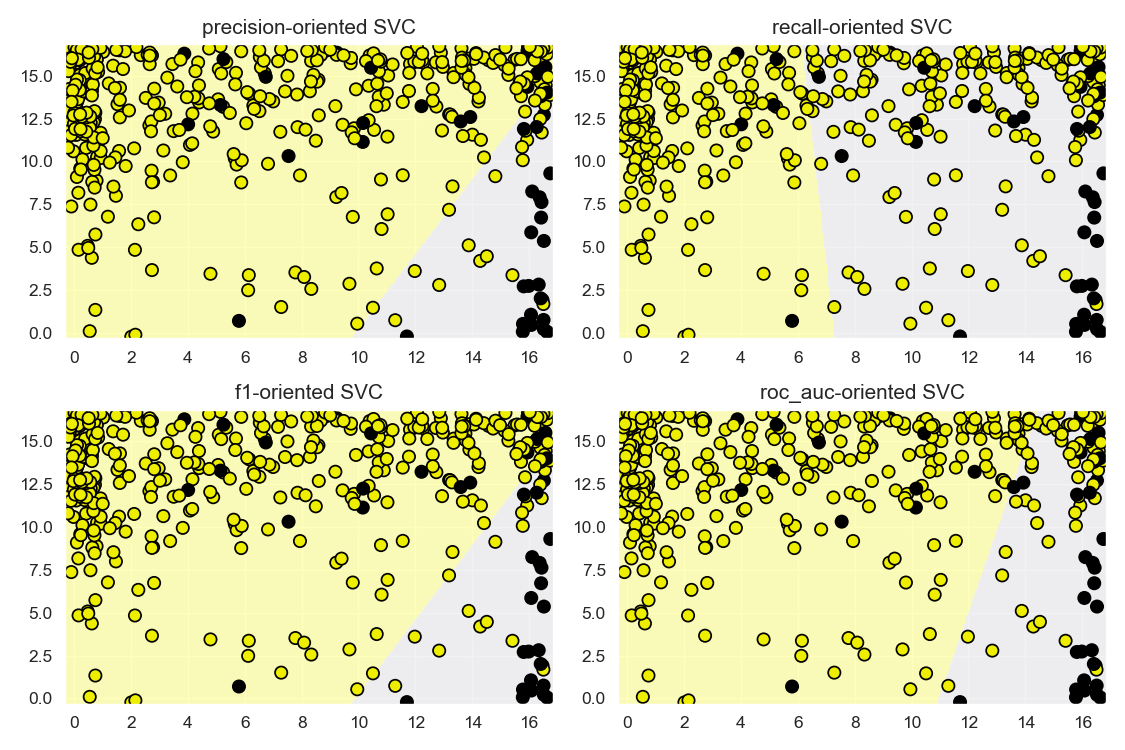

Grid best parameter (max. precision): {'class_weight': {1: 3}}
Grid best score (precision): 0.5309895790484026
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5578876664950017
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8947445344936857


In [31]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta


clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}

plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
    
plt.tight_layout()
plt.show()

We apply grid search here to explore different values of the optional `class weight parameter` that controls how much weight is given to each of the two classes during training:
    - As it turns out, optimizing for different evaluation metrics results in different optimal values of the class weight parameter. As the class weight parameter increases, more emphasis will be given to correctly classifying the positive class instances. 


1. The `precision-oriented` classifier we see here with class weight of `2`, tries hard to reduce false Positives while increasing true positives. So it focuses on the cluster of positive class points in the lower right corner where there are relatively few negative class points. Here, precision is over 50 percent.


2. In contrast, the `recall-oriented` classifier with class weight of `50`, tries hard to reduce the number of false negatives while increasing true positives. That is, it tries to find most of the positive class points as part of its positive class predictions.


3. We can also see that the decision boundary for the `F1-oriented` classifier has an optimal class weight of `3`, which is between the optimal class weight values for the precision and recall-oriented classifiers. Visually we can see that the F1-oriented classifier also has a kind of intermediate positioning between the precision and recall-oriented, decision boundaries. This makes sense given that F1 is the harmonic mean of precision and recall.



4. The `AUC-oriented` classifier with optimal class weight to `4` has a similar decision boundary to the F1-oriented classifier, but shifted slightly in favor of higher recall. 

### - Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


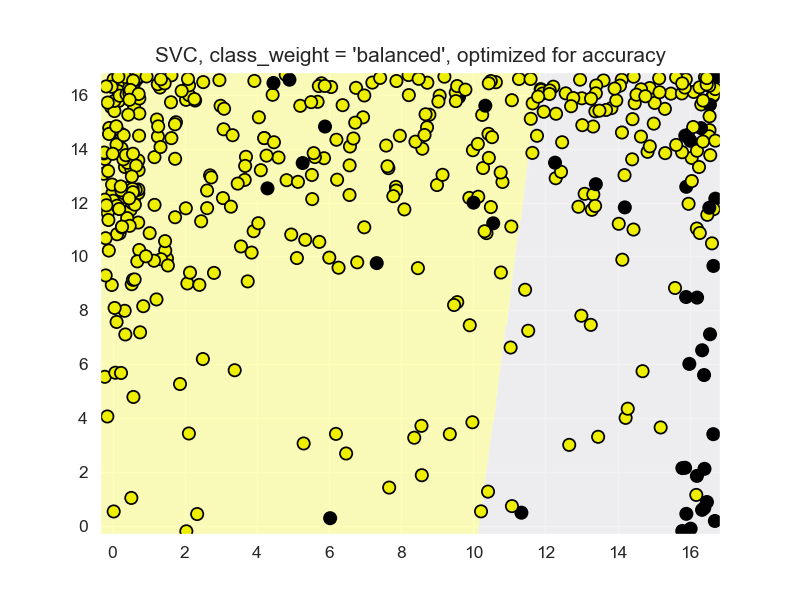

<IPython.core.display.Javascript object>


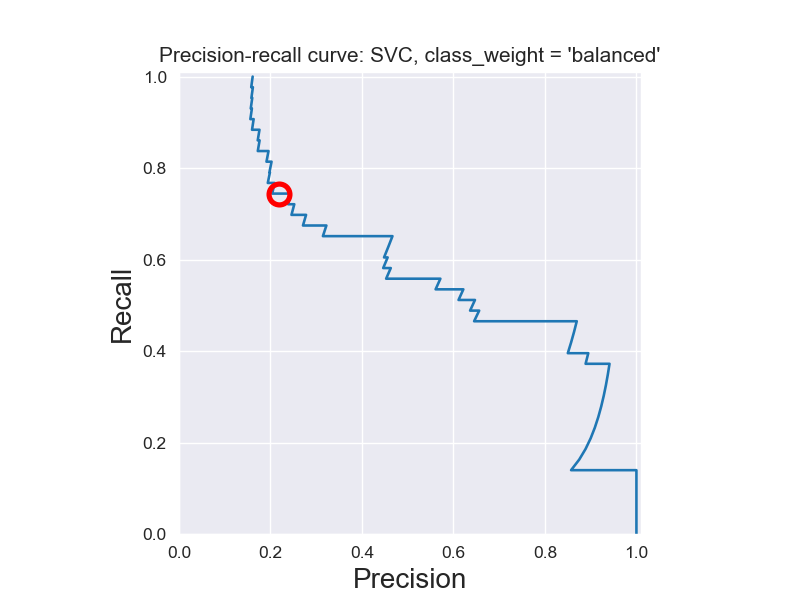

At zero threshold, precision: 0.22, recall: 0.74


<ipython-input-32-2596e5a35f49>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero] # presision.
closest_zero_r = recall[closest_zero]    # Recall.

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

![evalution_steps](evalution_steps.png)
![last_notes](last_notes.png)


# Quiz.

# 1.
A supervised learning model has been built to predict whether someone is infected with a new strain of a virus. The probability of any one person having the virus is 1%. Using accuracy as a metric, what would be a good choice for a baseline accuracy score that the new model would want to outperform?

- Answer = 0.99

# 2,3,4.
Given the following confusion matrix:
Compute the accuracy to three decimal places.
Compute the precision to three decimal places.
Compute the recall to three decimal places.
![CON_MATRICS](CON_MATRICS.png)
- Answer: accuracy= 0.906 , precision= 0.923 , recall = 0.960

# 5.
Using the fitted model `m` create a precision-recall curve to answer the following question:
For the fitted model `m`, approximately what precision can we expect for a recall of 0.8?
(Use y_test and X_test to compute the precision-recall curve. If you wish to view a plot, you can use `plt.show()`)

In [ ]:
print(m)
y_pridected_logreg = m.predict(X_test)
precision , recall , thresholds = precision_recall_curve(y_test, y_pridected_logreg)


plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure()
plt.xlim([0,1.01])
plt.ylim([0,1.01])
plt.plot(precision , recall , label = 'Precision-Recall Curve')

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# 6.
Given the following models and AUC scores, match each model to its corresponding ROC curve.
- Model 1 test set AUC score: 0.91
- Model 2 test set AUC score: 0.50
- Model 3 test set AUC score: 0.56
![Roc_quiz](Roc_quiz.png)

Answer:
- Model 1:Roc 1
- Model 2:Roc 3
- Model 3:Roc 2

# 7.
Given the following models and AUC scores, match each model to its corresponding ROC curve.
- Model 1 test set accuracy: 0.91
- Model 2 test set accuracy: 0.79
- Model 3 test set accuracy: 0.72

Answer: NO enough information is given.

# 8.
Using the fitted model `m` what is the macro precision score?
(Use y_test and X_test to compute the precision score.)

In [ ]:
#print(m)
y_predicted = m.predict(X_test)

print('Macro-averaged precision score = {:.3f} (Treat classes equally)'.
      format(precision_score(y_test , y_predicted , average = 'macro')))

# 9.
Question 9
Which of the following is true of the R-Squared metric? (Select all that apply)

Answer: 
- The best possible score is 1.0
- A model that always predicts the mean of Y would get a score of 0.0

# 10.
In a future society, a machine is used to predict a crime before it occurs. If you were responsible for tuning this machine, what evaluation metric would you want to maximize to ensure no innocent people (people not about to commit a crime) are imprisoned (where crime is the positive label)?

Answer: Precision
    * for 10,11 look at your hand written notes to get a better understanding at how to write a confusion matrix correctly.

# 11.
Consider the machine from the previous question. If you were responsible for tuning this machine, what evaluation metric would you want to maximize to ensure all criminals (people about to commit a crime) are imprisoned (where crime is the positive label)?

Answer: Recall

# 12.
A classifier is trained on an imbalanced multiclass dataset. After looking at the model’s precision scores, you find that the micro averaging is much smaller than the macro averaging score. Which of the following is most likely happening?

Answer : The model is probably misclassifying the frequent labels more than the infrequent labels.

# 13. 
Question 13
Using the already defined RBF SVC model `m`, run a grid search on the parameters C and gamma, for values [0.01, 0.1, 1, 10]. The grid search should find the model that best optimizes for recall. How much better is the recall of this model than the precision? (Compute recall - precision to 3 decimal places)

(Use y_test and X_test to compute precision and recall.)

In [ ]:
#print(m)
grid_values = {'gamma' : [0.01, 0.1, 1, 10], 'C':[0.01, 0.1, 1, 10]}
#1. let it know
grid_clf_recall = GridSearchCV(m, param_grid = grid_values , scoring= 'recall')
#2. Train
grid_clf_recall.fit(X_train, y_train)
#3. Test using decision_function()
y_decision_fn_score_recall = grid_clf_recall.decision_function(X_test)

#4. get the best grid value with respect to [Accuracy].
print('Grid best parameter(Max. Recal): ',grid_clf_recall.best_params_)
print('Grid best score of Recall corresponds to best param above:',
       grid_clf_recall.best_score_)

y_prediction = grid_clf_recall.predict(X_test)

recall_score = recall_score(y_test , y_prediction)
precision_score = precision_score(y_test , y_prediction)
diff = recall_score - precision_score


print('recall Score for the above model = {}'.format(recall_score))
print('Precision Score for the above model = {}'.format(precision_score))
print('Recall - precision = {}'.format(diff))


# 14.
Using the already defined RBF SVC model `m`, run a grid search on the parameters C and gamma, for values [0.01, 0.1, 1, 10]. The grid search should find the model that best optimizes for precision. How much better is the precision of this model than the recall? (Compute precision - recall to 3 decimal places)

(Use y_test and X_test to compute precision and recall.)

In [ ]:
#print(m)
grid_values = {'gamma' : [0.01, 0.1, 1, 10], 'C':[0.01, 0.1, 1, 10]}
#1. let it know
grid_clf_recall = GridSearchCV(m, param_grid = grid_values , scoring= 'precision')
#2. Train
grid_clf_recall.fit(X_train, y_train)
#3. Test using decision_function()
y_decision_fn_score_recall = grid_clf_recall.decision_function(X_test)

#4. get the best grid value with respect to [Accuracy].
print('Grid best parameter(Max. Recal): ',grid_clf_recall.best_params_)
print('Grid best score of Recall corresponds to best param above:',
       grid_clf_recall.best_score_)

y_prediction = grid_clf_rec all.predict(X_test)

recall_score = recall_score(y_test , y_prediction)
precision_score = precision_score(y_test , y_prediction)
diff =  precision_score - recall_score


print('recall Score for the above model = {}'.format(recall_score))
print('Precision Score for the above model = {}'.format(precision_score))
print('precision - Recall = {}'.format(diff))